In [116]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import os
import glob
import re


In [117]:
#=====Input==========

#Experiment Type: 'NAM' or 'Foam'
test_id = 'Foam'
test_con = 'Planar' #test orientation (Planar or Angled)

#For NAM 
if test_id =='NAM':
    test_type = '\\NAM2 100 Comparison' #Final savename for the figure
    test_vel = '100' #impact velocity 
    
    #Folder creation
    sample_type = '\Planar'
    
#For Foam
elif test_id == 'Foam':
    test_type = '\\Cylinder Prelim' #Final savename for the figure
    test_vel = 'ALL'
    
    #Folder creation
    sample_type = '\CalTech'

#Graph Colour Scheme: 'rk' for red-black or 'rgb' for randomised spectrum

plot_colour = 'rgb'

#=======================

#Access directory
if test_id=='NAM':
    dir = r'F:\My Drive\Oxford 2022-24\NAM 2\Figures'
    path = dir + sample_type
    #Save directory
    save_dir = os.path.join(path,'Figures')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    if test_con == 'Angled':
        savename1 = save_dir+test_type+'_X'+'.png'
        savename2 = save_dir+test_type+'_Y'+'.png'
    elif test_con == 'Planar':
        savename = save_dir + test_type + '.png'
elif test_id=='Foam':
    dir = r'F:\My Drive\Oxford 2022-24\DIHPB_Foam\Figures'
    path = dir + sample_type
    #Save directory
    save_dir = os.path.join(path,'Figures')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    savename = save_dir + test_type + '.png'

In [118]:
if test_con == 'Planar':
    #Search for all excel files
    csv_files = Path(path).glob('*.csv')
    xlsx_files = Path(path).glob('*.xlsx')
    all_files = list(csv_files) + list(xlsx_files)
    all_files=sorted(all_files)
    experiments = {} #dict
    
    #Combine then into a dataframe then into a nested dictionary 
    
    for filename in all_files:
        filename_str = str(filename)
        #For csv files
        if filename_str.endswith('.csv'):
            df = pd.read_csv(filename, usecols = ['Strain','Stress'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            strain = df['Strain'].values
            stress = df['Stress'].values
            experiments.update({test_name:{"strain": strain,"stress":stress}}) #nested
        #for xlsx files    
        elif filename_str.endswith(('.xls','xlsx')):
            df = pd.read_excel(filename, usecols = ['Strain','Stress'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            strain = df['Strain'].values
            stress = df['Stress'].values
            experiments.update({test_name:{"strain": strain,"stress":stress}}) #nested
elif test_con == 'Angled':
    #Search for all excel files
    csv_files = Path(path).glob('*.csv')
    xlsx_files = Path(path).glob('*.xlsx')
    all_files = list(csv_files) + list(xlsx_files)
    all_files=sorted(all_files)
    experiments = {} #dict
    
    #Combine then into a dataframe then into a nested dictionary 
    
    for filename in all_files:
        filename_str = str(filename)
        #For csv files
        if filename_str.endswith('.csv'):
            df = pd.read_csv(filename, usecols = ['Axial Time','Axial Strain','Bending Time','Bending Strain'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            time_x = df['Axial Time'].values
            strain_x = df['Axial Strain'].values
            time_y = df['Bending Time'].values
            strain_y = df['Bending Strain'].values
            experiments.update({test_name:{"time_x": time_x,"strain_x": strain_x,"time_y":time_y,"strain_y":strain_y}}) #nested
        #for xlsx files    
        elif filename_str.endswith(('.xls','xlsx')):
            df = pd.read_excel(filename, usecols = ['Axial Time','Axial Strain','Bending Time','Bending Strain'], index_col = None, header=0) #we only want strain and stress columns
            df = df.dropna()
            test_name = os.path.basename(filename)
            test_name = os.path.splitext(test_name)[0]
            time_x = df['Axial Time'].values
            strain_x = df['Axial Strain'].values
            time_y = df['Bending Time'].values
            strain_y = df['Bending Strain'].values
            experiments.update({test_name:{"time_x": time_x,"strain_x": strain_x,"time_y":time_y,"strain_y":strain_y}}) #nested

In [119]:
#Test velocity selection: Edit this based on type of graph (names REF master sheet)
if test_vel == '25':
    plots_wanted = ['A1_25','A2_25','A3_25','B1_25','B2_25','B3_25']
elif test_vel == '50':
    plots_wanted = ['A4_50','A5_50','A6_50','B4_50','B5_50','B6_50']
elif test_vel == '100':
    plots_wanted = ['A7_100','A8_100','A9_100','B7_100','B8_100','B9_100']
elif test_vel == '82':
    plots_wanted = ['NAM4_A_30_1','NAM4_A_30_2','NAM4_A_30_4','NAM4_B_30_1','NAM4_B_30_2','NAM4_B_30_3']
elif test_vel == 'QS':
    plots_wanted = list(experiments.keys())
elif test_vel == 'ALL':
    plots_wanted = list(experiments.keys())
elif test_vel == 'Rohacell':
    #plots_wanted = ['Rohacell_Real_40_1','Rohacell_Real_40_2','Rohacell_Real_40_3','Rohacell_Real_40R_1','Rohacell_Real_40R_2','Rohacell_Real_40R_3']
    #plots_wanted = ['Rohacell_Real_65_1','Rohacell_Real_65_2','Rohacell_Real_65_3','Rohacell_Real_65R_1','Rohacell_Real_65R_2','Rohacell_Real_65R_3']
    plots_wanted = ['Rohacell_Real_40R_1','Rohacell_Real_40R_2','Rohacell_Real_40R_3','Rohacell_Real_65R_1','Rohacell_Real_65R_2','Rohacell_Real_65R_3']
elif test_vel == 'Eggbox':
    #plots_wanted = ['Eggbox_40_T1','Eggbox_40_T3','Eggbox_40R_T4','Eggbox_40R_T7']
    plots_wanted = ['Eggbox_65_T2','Eggbox_65R_T5','Eggbox_65R_T6']
elif test_vel == 'Comparison':
    plots_wanted = ['Rohacell_40_T4','Rohacell_65_T8','Eggbox_40_T1','Eggbox_65_T2']


In [120]:
#Shifiting Plots 
#plot_name = 'NAM4_A_30_4'
#experiments[plot_name]['time_x'] =experiments[plot_name]['time_x']-0.00005

In [121]:
#plot_name2 = 'NAM4_B_30_2'
#experiments[plot_name2]['time_x'] =experiments[plot_name2]['time_x']+0.000002

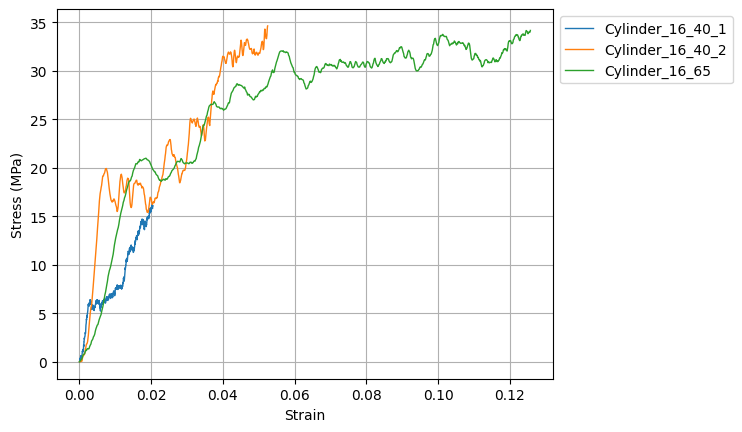

In [122]:
#Plotting


#For Planar 
if test_con == 'Planar' or test_con == 'Foam':
    if plot_colour == 'rk':
        #To set the colour cycles
        m=len(plots_wanted)
        is_red = range(0,m//2)
        
        for i, key in enumerate(plots_wanted):  
            if i in is_red:  
                plt.plot(experiments[key]["strain"], experiments[key]["stress"]*1e-6, label=key, color="red")
                plt.xlim(0,None)
                plt.ylim(0,10)
            else:
                plt.plot(experiments[key]["strain"], experiments[key]["stress"]*1e-6, label=key, color="black")
                plt.xlim(0,None)
                plt.ylim(0,10)
            
    elif plot_colour == 'rgb':
        for key in plots_wanted:
            plt.plot(experiments[key]["strain"], experiments[key]["stress"]*1e-6, label=key, linewidth = '1')

            #plt.xlim(0,None)
            #plt.ylim(0,10)
        

    
    plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
    plt.grid()
    #plt.gca().set_color_cycle(['red','black'])
    
    plt.xlabel("Strain")
    plt.ylabel("Stress (MPa)")
    #Save figure as png file
    plt.savefig(savename,bbox_inches='tight')

#For Angled
elif test_con == 'Angled':
    if plot_colour == 'rk':
    #To set the colour cycles
        m=len(plots_wanted)
        is_red = range(0,m//2)
        
        for i, key in enumerate(plots_wanted):  
            if i in is_red:
                plt.figure(1)
                plt.plot(experiments[key]["time_x"], experiments[key]["strain_x"], label=key, color="red")
            else:
                plt.plot(experiments[key]["time_x"], experiments[key]["strain_x"], label=key, color="black")
            plt.legend()
            plt.grid()
            plt.xlabel("Time (s)")
            plt.ylabel("Axial Strain")
            plt.savefig(savename1,bbox_inches='tight')
            
        for i, key in enumerate(plots_wanted): 
            if i in is_red:    
                plt.figure(2)
                plt.plot(experiments[key]["time_y"], experiments[key]["strain_y"], label=key, color="red")
            else:
                plt.plot(experiments[key]["time_y"], experiments[key]["strain_y"], label=key, color="black")
            plt.legend()
            plt.grid()
            plt.xlabel("Time (s)")
            plt.ylabel("Bending Strain")
            plt.savefig(savename2,bbox_inches='tight')
            
    elif plot_colour == 'rgb':
        for key in plots_wanted:
            plt.figure (1)
            plt.grid()
            plt.plot(experiments[key]["time_x"]*1e3, experiments[key]["strain_x"], label=key)
            plt.legend()
            plt.xlabel("Time (ms)")
            plt.ylabel("Axial Strain")
           
            plt.savefig(savename1,bbox_inches='tight')
            

            
            plt.figure (2)
            plt.plot(experiments[key]["time_y"]*1e3, experiments[key]["strain_y"], label=key)
            plt.legend()
            plt.xlabel("Time (ms)")
            plt.ylabel("Bending Strain")
            plt.savefig(savename2,bbox_inches='tight')
            

    #Save figure as png file
    
